<h1> <center> Dashboard </center> </h1>

In [1]:
import einops
import torch
import numpy as np
from PIL import Image
import json
from json2html import *
import tempfile
import webbrowser
import os

#### 1. Load the model

In [2]:
from models.TransUNet.model import MyTransUNet, build_the_model

In [31]:
model = build_the_model(
    device="cuda",
    model_path="models/TransUNet/Parameters/transunet_130epo_bce_vit8.meow"
)

model_name = "transunet_70epo_bce_vit8"

Trainable parameters amount: 67076987


#### 2. Load the company test dataset via custom dataloader

In [32]:
from models.TransUNet.dataloader import build_the_dataloader

In [33]:
main_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/company_target_images",
    mask_path="/home/student/Documents/Xrays/Data/company_target_masks/",
    name="main_targets"
)

Try to load data from f/home/student/Documents/Xrays/Data/company_target_images
Number of images: 58
Number of masks: 58

Volume of test dataset: 58



In [34]:
jenya_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/jenya_target_images",
    mask_path="/home/student/Documents/Xrays/Data/jenya_target_masks",
    name="jenya_targets"
)

Try to load data from f/home/student/Documents/Xrays/Data/jenya_target_images
Number of images: 35
Number of masks: 35

Volume of test dataset: 35



In [35]:
sg_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/strange_gun_images_targets",
    mask_path="/home/student/Documents/Xrays/Data/strange_gun_masks_targets",
    name="strange_gun"
)

Try to load data from f/home/student/Documents/Xrays/Data/strange_gun_images_targets
Number of images: 6
Number of masks: 6

Volume of test dataset: 6



# TODO: добавить тестовую выборку (dataloader)

#### 3. Build the Dashboard

In [36]:
from dashboard import Board

In [37]:
def render_fn(x):
    x = einops.rearrange(x, "b c h w -> (b c h) w", b=1, c=1)
    x *= 255
    x = x.to(torch.uint8)
    x = np.array(x.cpu())
    
    return x

In [45]:
board = Board(
    dataloaders=[            # dataloader returns tuple of any types objects
        main_dataloader,
        jenya_dataloader,
        # sg_dataloader
    ],
    model=model,            # model returns object that go right in the measure() and
                            # go in the render() wrapped with render_fn
    model_name=model_name,  # name of the model
    render_fn=render_fn,
    render_dl_idx=0,        # index of dataloader we need to render
    obj_item=1,             # index of element in tuple from dataloader that will be rendered
    obj_name_item=2,        # index of filename
    to_model_item=0,        # image
    limit=35,               # amount of rendered objects
    phs_in_row=2,           # amount of rendered objects in row
    get_randomly=False,     # it's usefull if dataloader is big and 
                            # we want to get different :limit: object from it to render  
    c=3
)

#### 4. Run the Dashboard

Try to form a storage with 58 objects from dataloader. Device: cuda:0
Try to form a storage with 35 objects from dataloader. Device: cuda:0
Storages has been formed
Render...


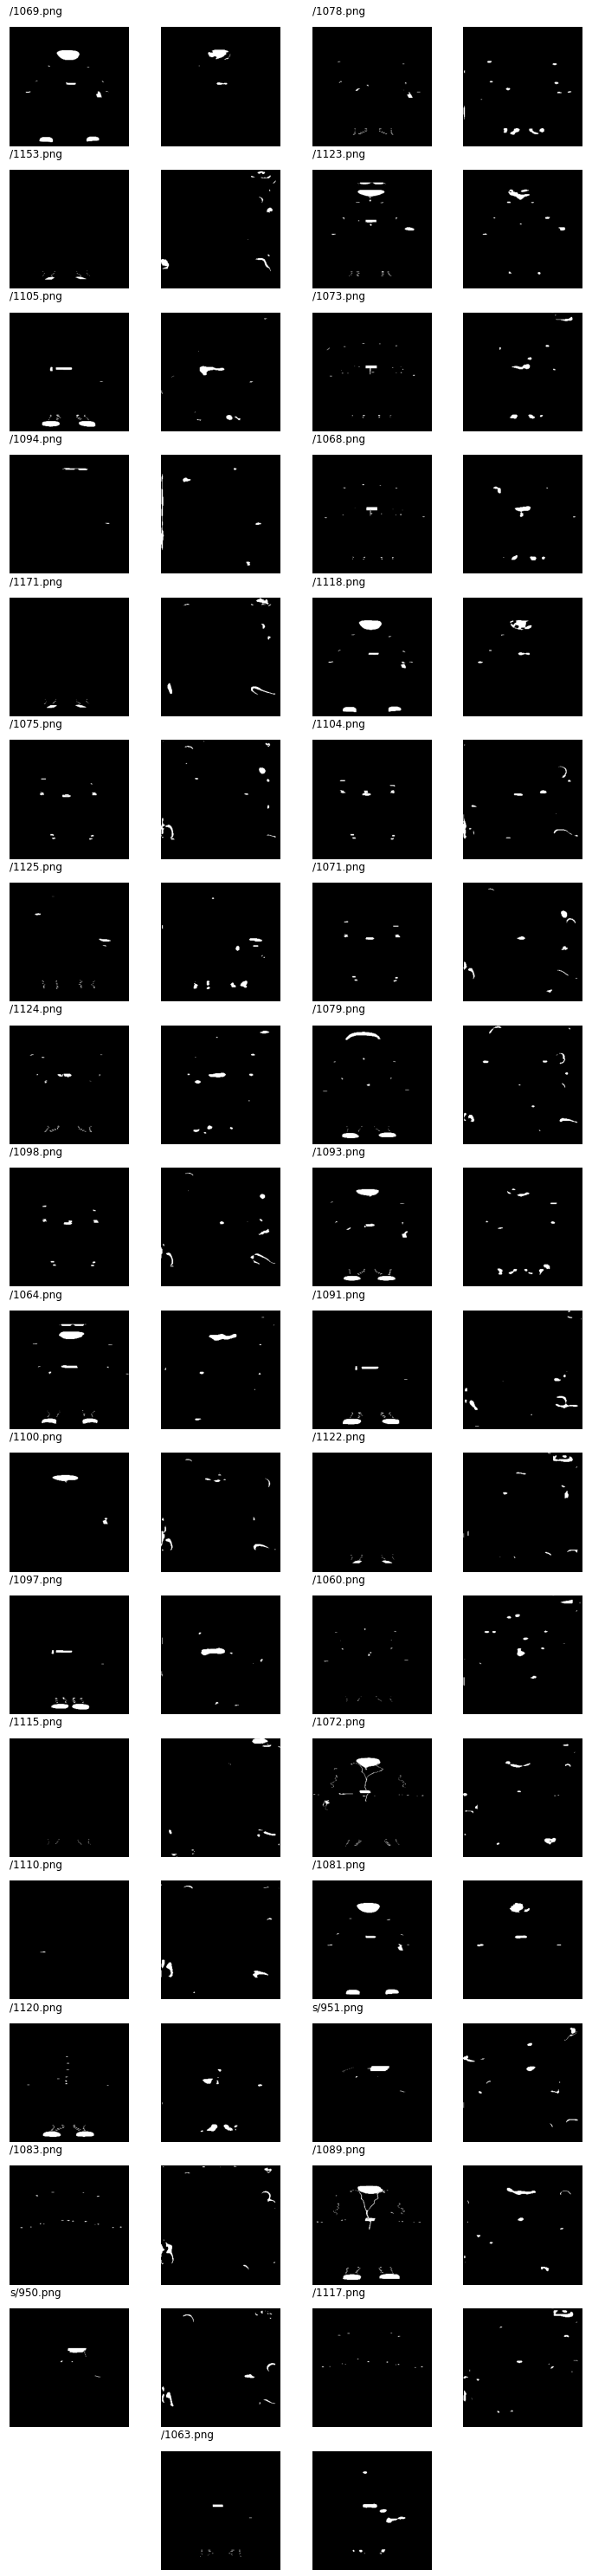

Measure...
Load IoU interface from metrics/IoU.py
Load MS_SSIM interface from metrics/MS_SSIM.py
Load IoU interface from metrics/IoU.py
Load MS_SSIM interface from metrics/MS_SSIM.py


{'transunet_70epo_bce_vit8': {'main_targets': {'IoU': {'min': -36.923824310302734,
    'max': 21.885913848876953,
    'mean': 0.7662325501441956,
    'nan_amount': 0},
   'MS_SSIM': {'min': 0.16244523227214813,
    'max': 0.9855540990829468,
    'mean': 0.6740740537643433,
    'nan_amount': 19}},
  'jenya_targets': {'IoU': {'min': 0.9450222253799438,
    'max': 0.998299241065979,
    'mean': 0.9865279197692871,
    'nan_amount': 0},
   'MS_SSIM': {'min': 0.9851081371307373,
    'max': 0.9866347908973694,
    'mean': 0.9854578375816345,
    'nan_amount': 0}}}}

In [46]:
board.run()

In [40]:
response = _
html = json2html.convert(json=response)

In [41]:
response

{'transunet_70epo_bce_vit8': {'main_targets': {'IoU': {'min': 0.9717549085617065,
    'max': 0.9998087286949158,
    'mean': 0.993457019329071,
    'nan_amount': 0},
   'MS_SSIM': {'min': 0.9849653840065002,
    'max': 0.9857898354530334,
    'mean': 0.9852036833763123,
    'nan_amount': 0}},
  'jenya_targets': {'IoU': {'min': -11.98184585571289,
    'max': 12.96296501159668,
    'mean': 2.5398054122924805,
    'nan_amount': 0},
   'MS_SSIM': {'min': 0.11969710886478424,
    'max': 0.22656817734241486,
    'mean': 0.16373027861118317,
    'nan_amount': 28}},
  'strange_gun': {'IoU': {'min': 0.9615844488143921,
    'max': 0.991237223148346,
    'mean': 0.9815910458564758,
    'nan_amount': 0},
   'MS_SSIM': {'min': 0.9853078126907349,
    'max': 0.9862451553344727,
    'mean': 0.9856454730033875,
    'nan_amount': 0}}}}

In [42]:
with tempfile.NamedTemporaryFile(mode="w", suffix=".html", delete=False) as tf:
    tf.write(html)
    webbrowser.open('file://' + os.path.realpath(tf.name))

In [ ]:
import os

In [ ]:
os.path.isfile("/usr/bin/google-chrome")